In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os 
os.chdir('/content/drive/My Drive/Deep_learning_unit')
folder = os.path.join('/content/drive/My Drive/Deep_learning_unit')
!ls 

Mounted at /content/drive
Assessment_82accuracy.ipynb  Final_Experiment.ipynb  FinalModel.ipynb


In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
import tensorflow as tf
import math
import timeit
from keras.layers.normalization import BatchNormalization

In [3]:
def load_cifar10(num_training=50000, num_test=10000):
    """
    Fetch the CIFAR-10 dataset from the web.
    """
    # Load the raw CIFAR-10 dataset and use appropriate data types and shapes
    cifar10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()


    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel

    return X_train, y_train, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_test, y_test = load_cifar10()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000,) int32
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


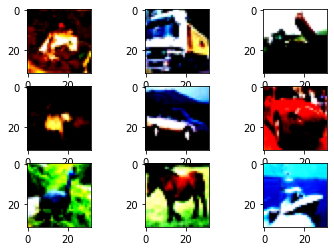

In [4]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3],kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),



    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    

    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same",activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [6]:
opt  = tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=0.001)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"] )


In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

history = model.fit(X_train, y_train, epochs=10,batch_size=128,callbacks = [early_stopping], validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 14s 16ms/step - loss: 2.7419 - accuracy: 0.3374 - val_loss: 3.1028 - val_accuracy: 0.2849
Epoch 2/10
391/391 [==============================] - 6s 14ms/step - loss: 1.8561 - accuracy: 0.5625 - val_loss: 1.5704 - val_accuracy: 0.6436
Epoch 3/10
391/391 [==============================] - 6s 15ms/step - loss: 1.5103 - accuracy: 0.6540 - val_loss: 1.3082 - val_accuracy: 0.6991
Epoch 4/10
391/391 [==============================] - 6s 15ms/step - loss: 1.2905 - accuracy: 0.7008 - val_loss: 1.1434 - val_accuracy: 0.7377
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 1.1126 - accuracy: 0.7362 - val_loss: 1.0307 - val_accuracy: 0.7608
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 1.0042 - accuracy: 0.7568 - val_loss: 0.9310 - val_accuracy: 0.7725
Epoch 7/10
391/391 [==============================] - 6s 15ms/step - loss: 0.9113 - accuracy: 0.7745 - val_loss: 0.8544 - val_accuracy: 0.787

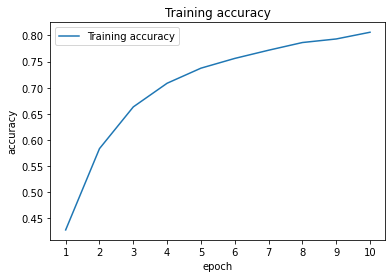

In [8]:
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'


acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs

plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

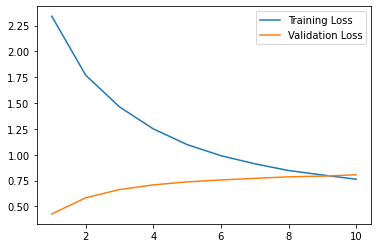

In [9]:
if int(tf.__version__.split('.')[0]) > 1:
    val_loss = 'val_loss'
else:
    acc_key = 'acc'

val_loss = history.history[acc_key]

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.legend()


plt.legend();


In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128 , verbose=2, callbacks = [early_stopping])
print('Accuracy on test dataset:', test_accuracy)

79/79 - 0s - loss: 0.7884 - accuracy: 0.7981
Accuracy on test dataset: 0.7980999946594238


In [11]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to PDF "Assessment_model.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-